# Step 1: Read data

In [1]:
import pandas as pd
pd.set_option("display.max_columns",200)

## 1) Training data

In [2]:
train_data = pd.read_csv("train.csv")
train_data.head(10)

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
5,5,p,4.30,x,t,n,f,s,c,n,5.91,8.20,NaN,NaN,w,NaN,n,t,z,NaN,d,a
6,6,e,9.65,p,y,w,f,e,c,k,19.07,12.69,NaN,s,w,NaN,NaN,t,e,NaN,g,w
7,7,p,4.55,x,e,e,f,a,NaN,y,8.31,9.77,NaN,NaN,y,NaN,w,t,z,NaN,d,a
8,8,p,7.36,f,h,e,f,x,d,w,5.77,17.13,b,NaN,w,NaN,NaN,f,f,NaN,d,a
9,9,e,6.45,x,t,n,f,a,d,w,7.13,12.77,NaN,NaN,e,NaN,NaN,f,f,NaN,d,a


In [3]:
train_data.shape

(3116945, 22)

## 2) Testing data

In [4]:
test_data = pd.read_csv("test.csv")
test_data.head(10)

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,17.12,b,NaN,w,u,w,t,g,NaN,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,10.75,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,3.14,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,8.51,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,13.70,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u
5,3116950,4.43,x,h,n,f,x,c,n,5.36,5.50,NaN,s,n,NaN,NaN,t,r,NaN,d,a
6,3116951,2.92,x,d,n,f,p,NaN,e,4.83,10.27,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
7,3116952,2.59,o,NaN,k,f,f,f,f,2.73,12.71,NaN,g,g,NaN,NaN,f,f,NaN,d,a
8,3116953,4.13,x,t,o,f,a,c,n,5.36,6.59,NaN,y,o,NaN,NaN,t,z,NaN,d,w
9,3116954,11.91,f,e,b,f,NaN,c,b,5.32,20.20,NaN,NaN,w,NaN,NaN,t,f,NaN,d,a


In [5]:
test_data.shape

(2077964, 21)

# Step 2: EDA

## 1) Distribution and outliers of numerical variables

Matplotlib is building the font cache; this may take a moment.


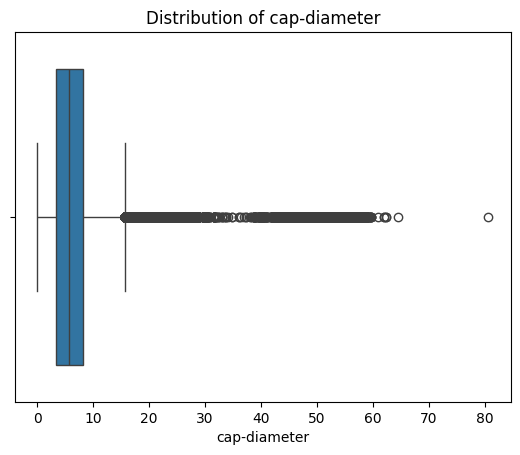

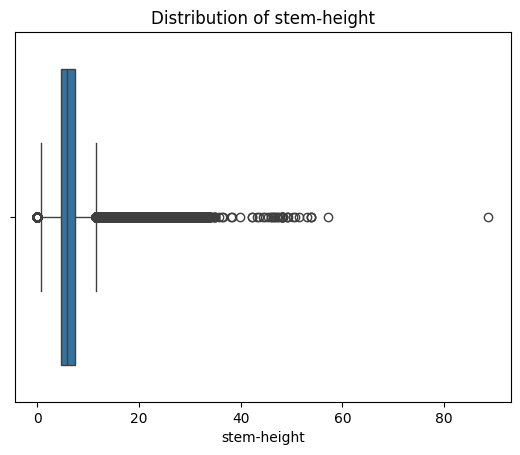

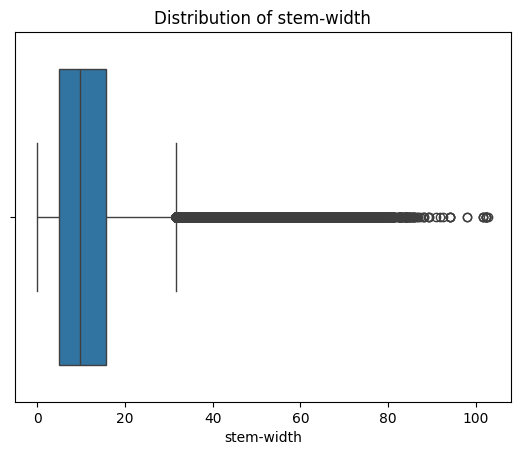

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in train_data.select_dtypes(include = "number").columns:
    if i == "id":
        continue
    sns.boxplot(data = train_data, x = i)
    # sns.histplot(data = train_data, x = i)
    plt.title(f"Distribution of {i}")
    plt.show()

## 2) Relationship between features

<Figure size 1000x800 with 0 Axes>

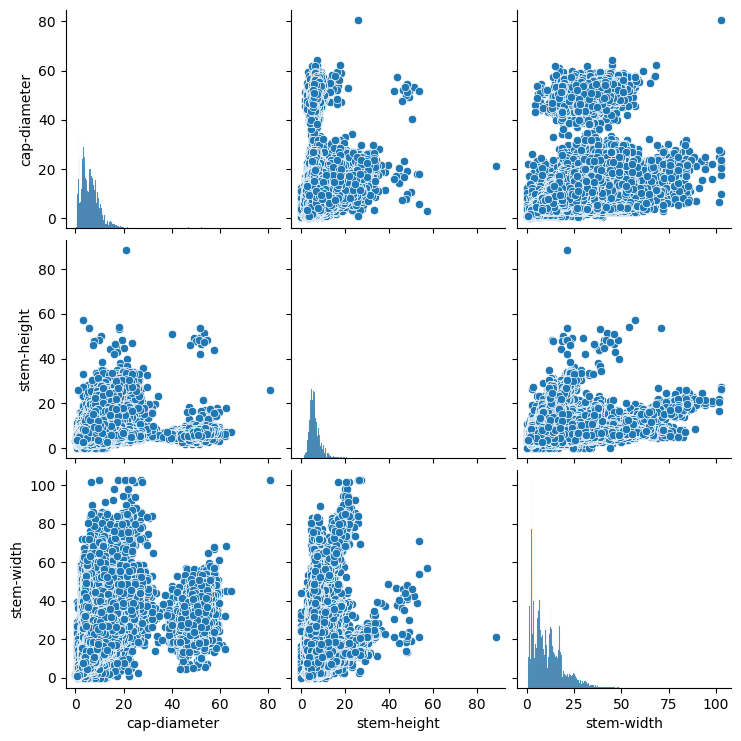

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
sns.pairplot(train_data.drop(columns = ["id"]))
plt.show()

## 3) Correlation matrix

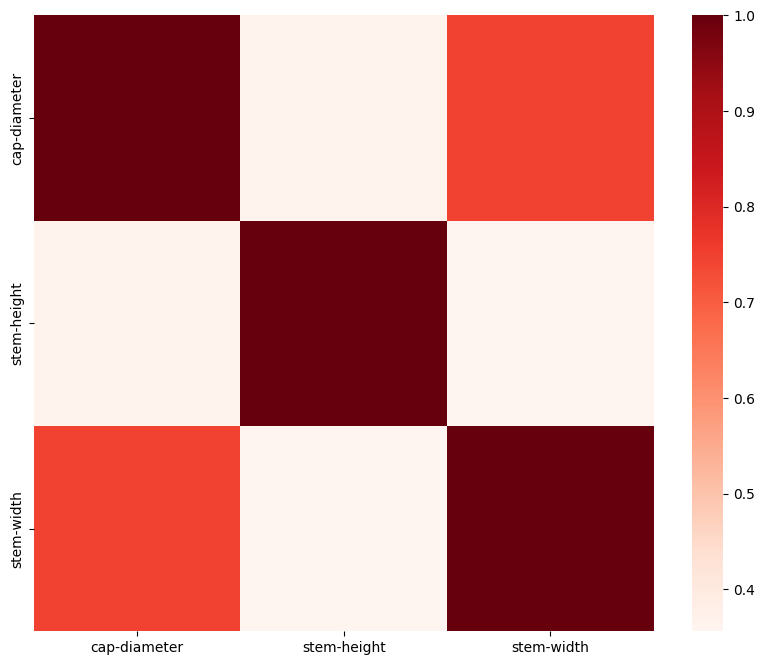

In [9]:
plt.figure(figsize=(10,8))
numeric_corr = train_data.drop(columns = "id").select_dtypes(include = "number")
corr = numeric_corr.corr()
sns.heatmap(corr, cmap="Reds")
plt.show()

## 4) Target variable

Text(0.5, 1.0, 'Distribution of mushroom classes')

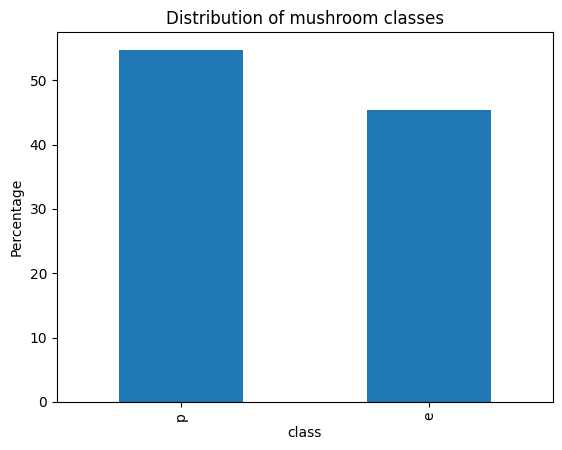

In [10]:
label_percentage = train_data["class"].value_counts(normalize = True)*100

ax = label_percentage.plot(kind = "bar")

ax.set_ylabel("Percentage")
ax.set_title("Distribution of mushroom classes")

## 5) Missing values

In [11]:
# Missing values in train_data
missing_values_train = train_data.isnull().sum().to_dict()

# Missing values in test_data
missing_values_test = test_data.isnull().sum().to_dict()

# Get columns with missing values > 0 in train_data
filtered_missing_values_train = {key: value for key, value in missing_values_train.items() if value > 0}

# Get columns with missing values > in test_data
filtered_missing_values_test = {key: value for key, value in missing_values_test.items() if value > 0}

print("Dictionary of columns with missing values > 0 in train_data:\n\n",filtered_missing_values_train,"\n")
print("Dictionary of columns with missing values > 0 in test_data:\n\n",filtered_missing_values_test)

Dictionary of columns with missing values > 0 in train_data:

 {'cap-diameter': 4, 'cap-shape': 40, 'cap-surface': 671023, 'cap-color': 12, 'does-bruise-or-bleed': 8, 'gill-attachment': 523936, 'gill-spacing': 1258435, 'gill-color': 57, 'stem-root': 2757023, 'stem-surface': 1980861, 'stem-color': 38, 'veil-type': 2957493, 'veil-color': 2740947, 'has-ring': 24, 'ring-type': 128880, 'spore-print-color': 2849682, 'habitat': 45} 

Dictionary of columns with missing values > 0 in test_data:

 {'cap-diameter': 7, 'cap-shape': 31, 'cap-surface': 446904, 'cap-color': 13, 'does-bruise-or-bleed': 10, 'gill-attachment': 349821, 'gill-spacing': 839595, 'gill-color': 49, 'stem-height': 1, 'stem-root': 1838012, 'stem-surface': 1321488, 'stem-color': 21, 'veil-type': 1971545, 'veil-color': 1826124, 'has-ring': 19, 'ring-type': 86195, 'spore-print-color': 1899617, 'habitat': 25}


In [12]:
# Missing values in percentage of train_data

filtered_dict_train_df = train_data[filtered_missing_values_train.keys()]
miss_perc_train = (filtered_dict_train_df.isnull().sum()/train_data.shape[0]*100).sort_values(ascending = False)
miss_perc_train

veil-type               94.884350
spore-print-color       91.425482
stem-root               88.452732
veil-color              87.936970
stem-surface            63.551362
gill-spacing            40.373988
cap-surface             21.528227
gill-attachment         16.809280
ring-type                4.134818
gill-color               0.001829
habitat                  0.001444
cap-shape                0.001283
stem-color               0.001219
has-ring                 0.000770
cap-color                0.000385
does-bruise-or-bleed     0.000257
cap-diameter             0.000128
dtype: float64

In [13]:
# Missing values in percentage of test_data

filtered_dict_test_df = test_data[filtered_missing_values_test.keys()]
miss_perc_test = (filtered_dict_test_df.isnull().sum()/test_data.shape[0]*100).sort_values(ascending = False)
miss_perc_test

veil-type               94.878689
spore-print-color       91.417224
stem-root               88.452543
veil-color              87.880445
stem-surface            63.595327
gill-spacing            40.404694
cap-surface             21.506821
gill-attachment         16.834796
ring-type                4.148051
gill-color               0.002358
cap-shape                0.001492
habitat                  0.001203
stem-color               0.001011
has-ring                 0.000914
cap-color                0.000626
does-bruise-or-bleed     0.000481
cap-diameter             0.000337
stem-height              0.000048
dtype: float64

### Get lists of numerical variables, categorical variables from above dictionaries

In [14]:
# For train_data

fill_na_num_col_train = []
fill_na_cat_col_train = []

for key, value in filtered_missing_values_train.items():
    if pd.api.types.is_numeric_dtype(train_data[key]):
        fill_na_num_col_train.append(key)
    elif pd.api.types.is_categorical_dtype(train_data[key]) or pd.api.types.is_object_dtype(train_data[key]):
        fill_na_cat_col_train.append(key)
    
print("List of numerical columns with missing values for train_data:\n\n", fill_na_num_col_train,"\n")
print("List of categorical columns with missing values for train_data:\n\n", fill_na_cat_col_train)

List of numerical columns with missing values for train_data:

 ['cap-diameter'] 

List of categorical columns with missing values for train_data:

 ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat']


C:\Users\admin\AppData\Local\Temp\ipykernel_22488\2836099278.py:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(train_data[key]) or pd.api.types.is_object_dtype(train_data[key]):


In [15]:
# For test_data

fill_na_num_col_test = []
fill_na_cat_col_test = []

for key, value in filtered_missing_values_test.items():
    if pd.api.types.is_numeric_dtype(test_data[key]):
        fill_na_num_col_test.append(key)
    elif pd.api.types.is_categorical_dtype(test_data[key]) or pd.api.types.is_object_dtype(test_data[key]):
        fill_na_cat_col_test.append(key)
    
print("List of numerical columns with missing values for train_data:\n\n", fill_na_num_col_test,"\n")
print("List of categorical columns with missing values for train_data:\n\n", fill_na_cat_col_test)

List of numerical columns with missing values for train_data:

 ['cap-diameter', 'stem-height'] 

List of categorical columns with missing values for train_data:

 ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat']


C:\Users\admin\AppData\Local\Temp\ipykernel_22488\2383603785.py:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(test_data[key]) or pd.api.types.is_object_dtype(test_data[key]):


# Step 3: Clean data

In [16]:
# Drop id column for train_data
train_data = train_data.drop(columns = ["id"])

In [17]:
# Drop some columns in train_data with most missing values(> 80%):
to_drop_cols_train = miss_perc_train[miss_perc_train > 80].index.to_list()
train_data = train_data.drop(columns = to_drop_cols_train)

In [18]:
train_data.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-surface', 'stem-color', 'has-ring',
       'ring-type', 'habitat', 'season'],
      dtype='object')

In [19]:
# Drop some columns in test_data with most missing values(> 80%):
to_drop_cols_test = miss_perc_test[miss_perc_test > 80].index.to_list()
test_data = test_data.drop(columns = to_drop_cols_test)

In [20]:
test_data.columns

Index(['id', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-surface', 'stem-color', 'has-ring',
       'ring-type', 'habitat', 'season'],
      dtype='object')

## Function to fill missing values based on data type

In [21]:
def fill_missing_values(dataframe):
    for i in dataframe.columns:
        # Fill missing values for numerical columns with mean
        if pd.api.types.is_numeric_dtype(dataframe[i]):
            dataframe[i].fillna(dataframe[i].mean(), inplace = True)
        
        # Fill missing values for categorical columns with mode (most frequent value)
        elif pd.api.types.is_categorical_dtype(dataframe[i]) or pd.api.types.is_object_dtype(dataframe[i]):
            dataframe[i].fillna(dataframe[i].mode()[0], inplace = True)

## Call above function to fill missing values in both train_data and test_data

In [22]:
import warnings
warnings.filterwarnings("ignore")
fill_missing_values(train_data)
fill_missing_values(test_data)

## Check missing values again

In [23]:
if train_data.isnull().sum().sum() == 0 and test_data.isnull().sum().sum() == 0:
    print("No missing values in train_data and test_data")
else:
    print("There are still missing values to clean")

No missing values in train_data and test_data


In [24]:
train_data.shape

(3116945, 17)

In [25]:
test_data.shape

(2077964, 17)

# Step 4: Prepare data for modeling

## 1) Encode training and testing data

In [ ]:
import category_encoders as ce 

# Categorical features/columns in train_data
categorical_features = train_data.select_dtypes(include = ["object", "category"]).columns.to_list()

# Numerical features/columns in train_data
numerical_features = train_data.select_dtypes(include = "number").columns.tolist()

if "class" in categorical_features:
    categorical_features.remove("class")
    
target_encoder = ce.TargetEncoder(cols = categorical_features)

# Entire features to train the upcoming model 
X_train = train_data.drop(columns = "class")

# Target variable to predict 
y_train = train_data["class"].map({"e" : 1, "p": 0})

# Fit and transform the target encoder on the training data
X_train_encoded = target_encoder.fit_transform(X_train, y_train)

# Transform the test data
X_test_encoded = target_encoder.transform(test_data.drop( columns = "id"))

## 2) Split encoded training data into training and testing parts 

In [30]:
from sklearn.model_selection import train_test_split

# Here, the training data (it's encoded train_data ) is split into training (80%) and validation sets (20%)
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_encoded, y_train, test_size = 0.2, random_state = 42)

print("Size of the features in training set:\n",X_train_split.shape, "\n")
print("Size of the validation set:\n",X_val.shape, "\n")
print("Size of the target variable in training set:\n",y_train_split.shape, "\n")
print("Size of the target variable in validation set:\n",y_val.shape)

Size of the features in training set:
 (2493556, 16) 

Size of the validation set:
 (623389, 16) 

Size of the target variable in training set:
 (2493556,) 

Size of the target variable in validation set:
 (623389,)


# Step 5: Implement Random Forest model

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Start the model
rf_model = RandomForestClassifier(random_state = 42)

# Train the model with predefined features and target variable
rf_model.fit(X_train_split, y_train_split)

# Make predictions on predefined the validation set
y_pred_rf = rf_model.predict(X_val)

# Step 6: Evaluate the model

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

# Accuracy of the trained random forest model 
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print("Accuracy of the model:", accuracy_rf, "\n")

# Confusion matrix of the model 
conf_matrix_rf = confusion_matrix(y_val, y_pred_rf)
print("Confusion matrix of the model:\n", conf_matrix_rf, "\n")

# Classification report for the model
class_report_rf = classification_report(y_val, y_pred_rf)
print("Classification report for the model:\n", class_report_rf)

Accuracy of the model: 0.9912141536023253 

Confusion matrix of the model:
 [[337955   3037]
 [  2440 279957]] 

Classification report for the model:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    340992
           1       0.99      0.99      0.99    282397

    accuracy                           0.99    623389
   macro avg       0.99      0.99      0.99    623389
weighted avg       0.99      0.99      0.99    623389



# Step 7: Submit predictions to the competition

In [34]:
# Make predictions on real testing data (it's encoded testing data) from the competition
y_pred_test_rf = rf_model.predict(X_test_encoded)

In [37]:
data_submission = pd.DataFrame({
    "id" : range(3116945, 3116945 + len(y_pred_test_rf)),
    "class": y_pred_test_rf
})

data_submission["class"] = data_submission["class"].map({1: "e", 0: "p"})

data_submission.to_csv("submission.csv", index = False)

print("Data for submission is exported successfully")

Data for submission is exported successfully
